In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
from data_utils import load_cakes, show_cv_image, show_sample
from feature_utils import compute_hog_from_path
from eval_utils import evaluate

## Load data

In [3]:
df = load_cakes()

df

Trying iterating through .\Cake\banhmi ...
SUCCESS! There is (are) 50 item(s)
Trying iterating through .\Cake\cookie ...
SUCCESS! There is (are) 50 item(s)
Trying iterating through .\Cake\croissaint ...
SUCCESS! There is (are) 50 item(s)
Trying iterating through .\Cake\donut ...
SUCCESS! There is (are) 50 item(s)
Trying iterating through .\Cake\pizza ...
SUCCESS! There is (are) 50 item(s)
Trying iterating through .\Cake\pretzel ...
SUCCESS! There is (are) 50 item(s)
Overall, there is (are) 300 item(s)


,filepath,label
0,.\Cake\banhmi\1.jpg,banhmi
1,.\Cake\banhmi\10.jpg,banhmi
2,.\Cake\banhmi\11.jpg,banhmi
3,.\Cake\banhmi\12.jpg,banhmi
4,.\Cake\banhmi\13.jpg,banhmi
...,...,...
295,.\Cake\pretzel\50.jpg,pretzel
296,.\Cake\pretzel\6.jpg,pretzel
297,.\Cake\pretzel\7.jpg,pretzel
298,.\Cake\pretzel\8.jpg,pretzel


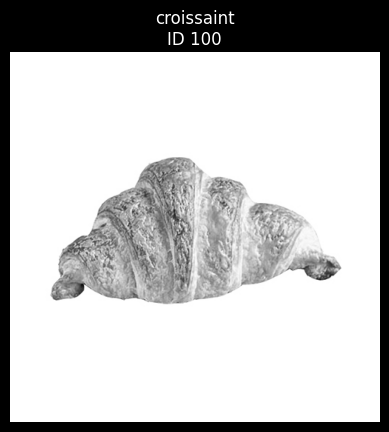

In [4]:
show_sample(df, 100)

## Preprocessing

HOG

Image shape    : (500, 500, 3)
HOG shape      : (8100,)
HOG image shape: (128, 128)


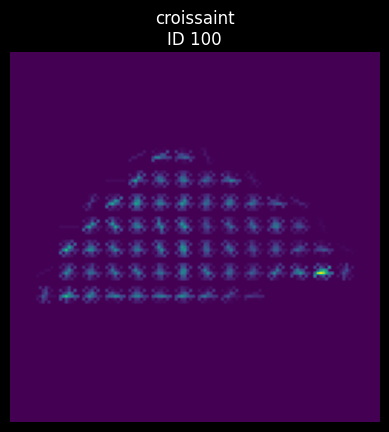

In [5]:
i = 100

img = cv.imread(df.filepath.iloc[i])
label = df.label.iloc[i]
hog_features, hog_img = compute_hog_from_path(df.filepath.iloc[i])

print(f'Image shape    : {img.shape}')
print(f'HOG shape      : {hog_features.shape}')
print(f'HOG image shape: {hog_img.shape}')
show_cv_image(hog_img, title=f'{label}\nID {i}')

In [6]:
hog_features = []
for filepath in df.filepath:
    hog, _ = compute_hog_from_path(filepath)
    hog_features.append(hog)
df['hog_features'] = hog_features

In [7]:
df

,filepath,label,hog_features
0,.\Cake\banhmi\1.jpg,banhmi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,.\Cake\banhmi\10.jpg,banhmi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,.\Cake\banhmi\11.jpg,banhmi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,.\Cake\banhmi\12.jpg,banhmi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,.\Cake\banhmi\13.jpg,banhmi,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
295,.\Cake\pretzel\50.jpg,pretzel,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
296,.\Cake\pretzel\6.jpg,pretzel,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
297,.\Cake\pretzel\7.jpg,pretzel,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
298,.\Cake\pretzel\8.jpg,pretzel,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
X = np.array(df.hog_features.tolist())
y = np.array(df.label.tolist())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1533)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[0], y_train[0])

(210, 8100) (90, 8100) (210,) (90,)
[0. 0. 0. ... 0. 0. 0.] pretzel


In [9]:
classes = np.unique(y).tolist()

classes

['banhmi', 'cookie', 'croissaint', 'donut', 'pizza', 'pretzel']

## $k$-NN with several `n_neighbors` values


In [10]:
from sklearn.neighbors import KNeighborsClassifier

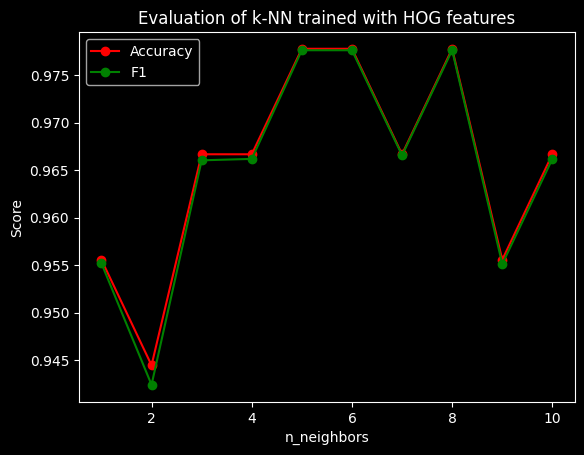

In [11]:
n_neighbors_values = []
accuracy_scores = []
f1_scores = [] 

for n_neighbors in range(1, 11):

    # Build and fit the classifier
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, y_train)

    # Predict with X_test
    y_pred = classifier.predict(X_test)
    assert y_pred.shape == y_test.shape

    # Evaluate using accuracy, precision, recall and F1 score
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    n_neighbors_values.append(n_neighbors)

plt.plot(n_neighbors_values, accuracy_scores, 'ro-', label='Accuracy')
plt.plot(n_neighbors_values, f1_scores, 'go-', label='F1')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.title('Evaluation of k-NN trained with HOG features')
# plt.ylim(top=1)

plt.show()

              precision    recall  f1-score   support

      banhmi       1.00      1.00      1.00        21
      cookie       1.00      0.95      0.97        19
  croissaint       0.92      1.00      0.96        11
       donut       1.00      0.94      0.97        16
       pizza       0.92      1.00      0.96        11
     pretzel       1.00      1.00      1.00        12

    accuracy                           0.98        90
   macro avg       0.97      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



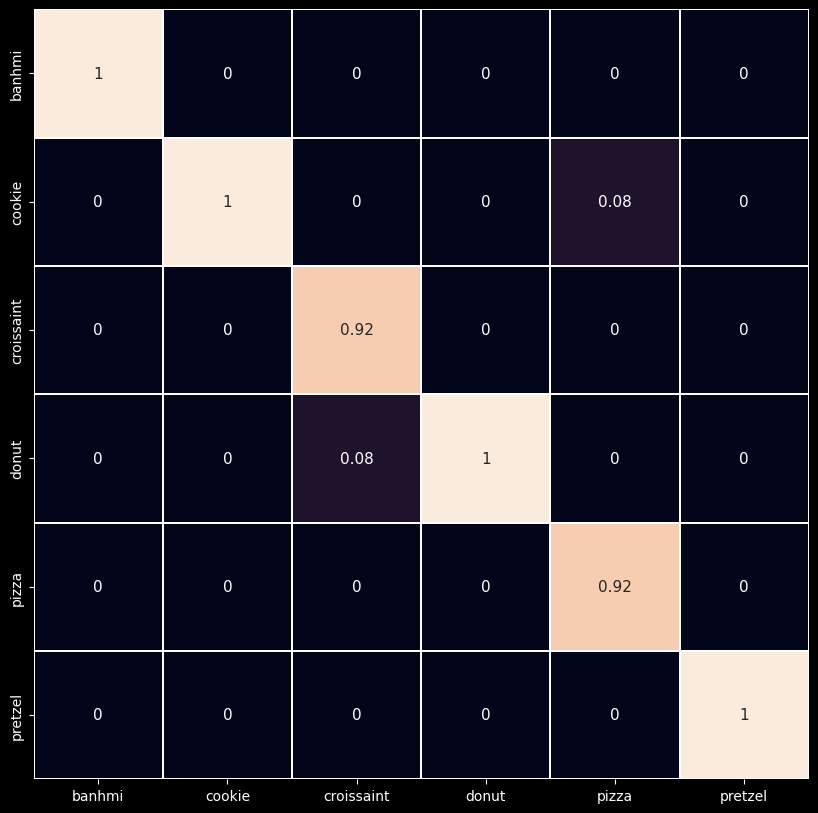

In [12]:
# Retry with n_neighbors=6

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate(y_pred, y_test, classes)

## SVM


In [13]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

      banhmi       1.00      0.95      0.98        21
      cookie       1.00      1.00      1.00        18
  croissaint       0.92      0.92      0.92        12
       donut       0.93      0.93      0.93        15
       pizza       1.00      1.00      1.00        12
     pretzel       0.92      1.00      0.96        12

    accuracy                           0.97        90
   macro avg       0.96      0.97      0.96        90
weighted avg       0.97      0.97      0.97        90



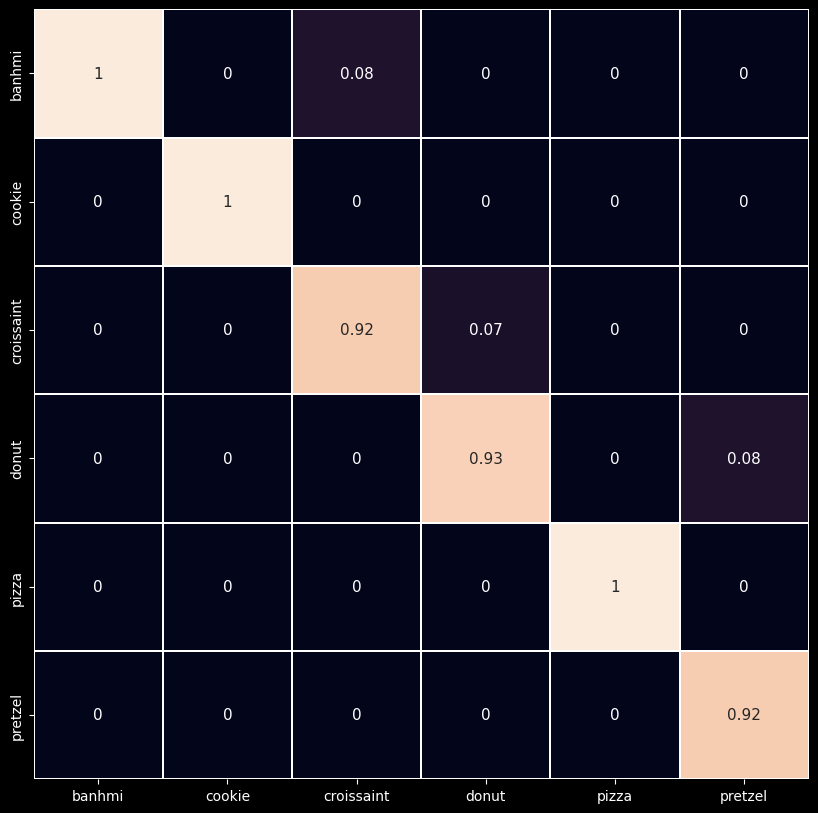

In [14]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate(y_test, y_pred, classes)

## Naive Bayes

In [15]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

              precision    recall  f1-score   support

      banhmi       0.95      0.86      0.90        21
      cookie       0.95      1.00      0.97        18
  croissaint       0.77      0.83      0.80        12
       donut       0.93      0.93      0.93        15
       pizza       1.00      0.92      0.96        12
     pretzel       0.92      1.00      0.96        12

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.93      0.92      0.92        90



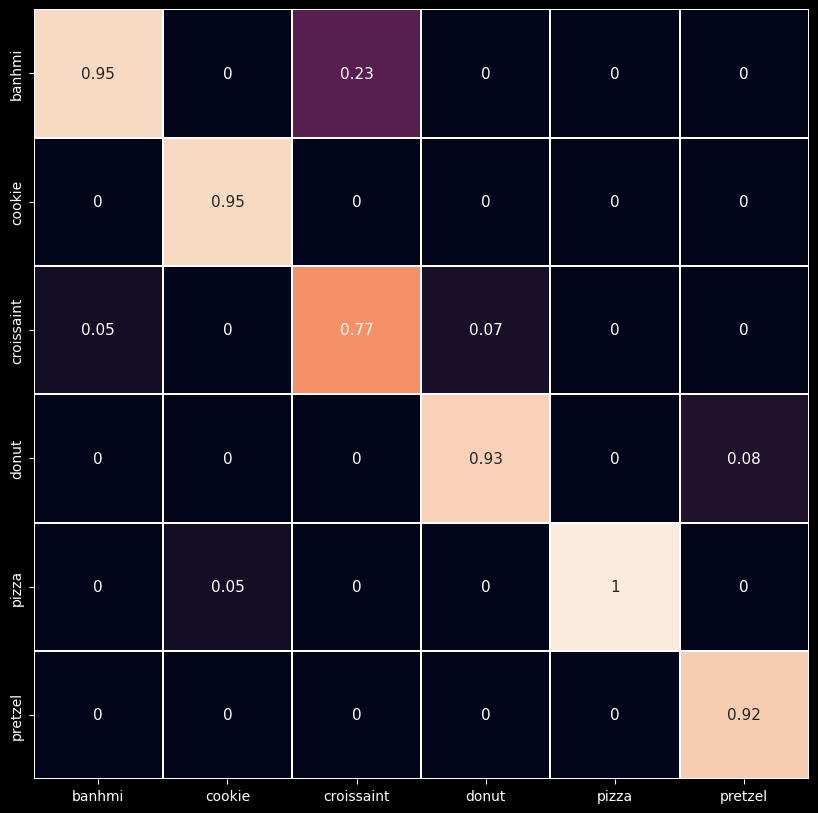

In [16]:
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate(y_test, y_pred, classes)

              precision    recall  f1-score   support

      banhmi       0.92      0.57      0.71        21
      cookie       1.00      0.78      0.88        18
  croissaint       0.37      0.58      0.45        12
       donut       0.67      0.80      0.73        15
       pizza       0.90      0.75      0.82        12
     pretzel       0.69      0.92      0.79        12

    accuracy                           0.72        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.79      0.72      0.73        90



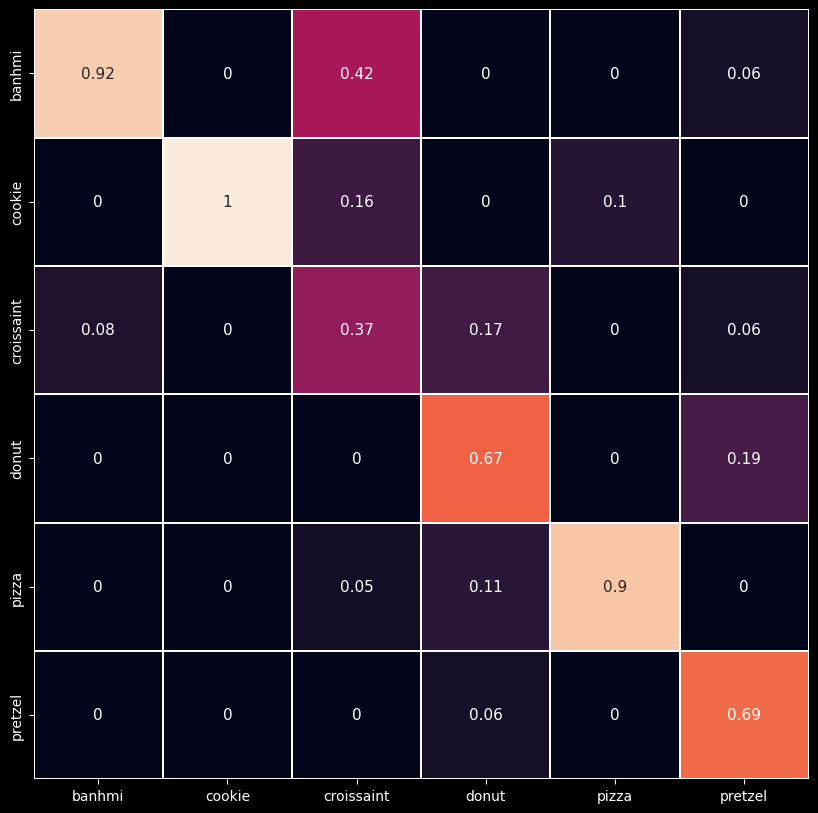

In [17]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate(y_test, y_pred, classes)

              precision    recall  f1-score   support

      banhmi       0.95      0.90      0.93        21
      cookie       0.95      1.00      0.97        18
  croissaint       0.83      0.83      0.83        12
       donut       0.93      0.93      0.93        15
       pizza       1.00      0.92      0.96        12
     pretzel       0.92      1.00      0.96        12

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



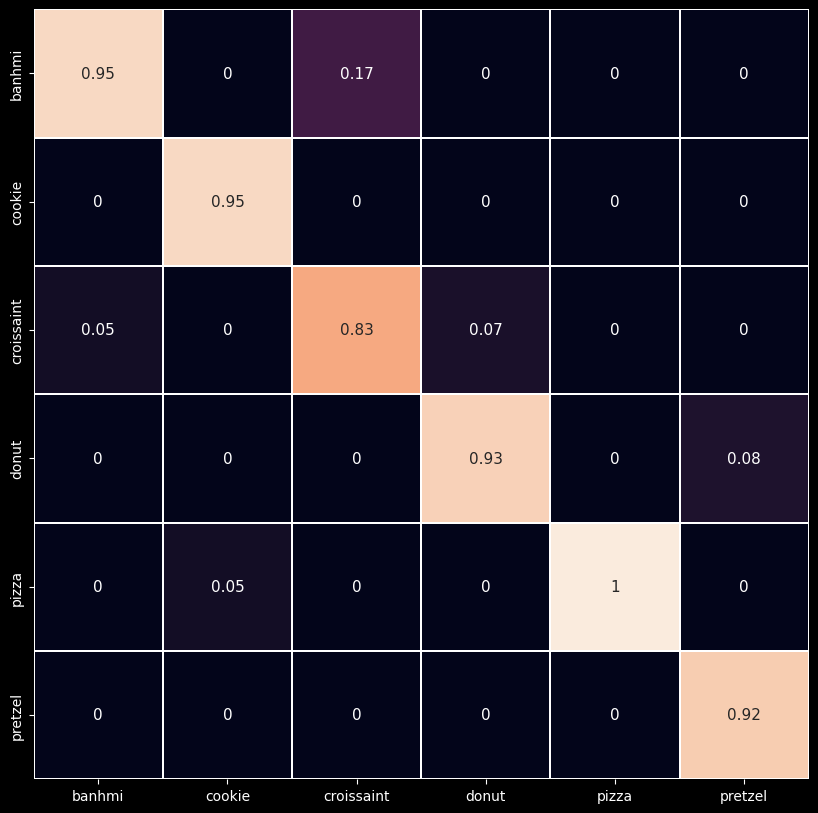

In [18]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

evaluate(y_test, y_pred, classes)